<p><img src="https://wallpapercave.com/wp/wp6889129.jpg"></p>

## Are Netflix's movies getting shorter over time? In this project, real world data, from Netlix, will be analyzed using Pandas to manipulate them and Matplotlib to visualize the gathered information.


### We have been provided with the information that the average movie durations, for the years from 2011 to 2020, are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


years = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]
movie_dict = {"years":years,"durations":durations}

movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

### 1.Creating a DataFrame from a dictionary and visualize our data

In [41]:
durations_df = pd.DataFrame(movie_dict)

durations_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


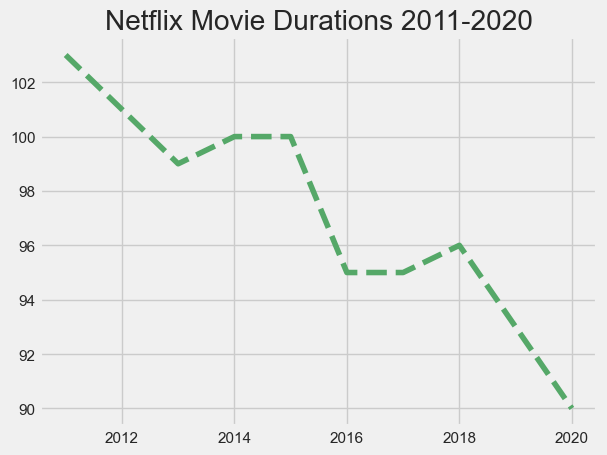

In [43]:
fig = plt.figure()
plt.plot(durations_df['years'],durations_df['durations'],"g--")
plt.title('Netflix Movie Durations 2011-2020')
plt.show()

### 2.Loading the data from  CSV, filtering for movies and plot them

<p>Well, it looks like there is something to the idea that movie lengths have decreased over the past ten years!</p>

<li>What does this trend look like over a longer period of time?</li>
<li>Is this explainable by something like the genre of entertainment?</li>

In [34]:
netflix_df = pd.DataFrame(pd.read_csv(r"C:\Users\User\Downloads\netflix_data.csv"))

netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [35]:
netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']

netflix_movies_col_subset = netflix_df_movies_only.loc[:,["title", "country", "genre", "release_year","duration"]]

netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


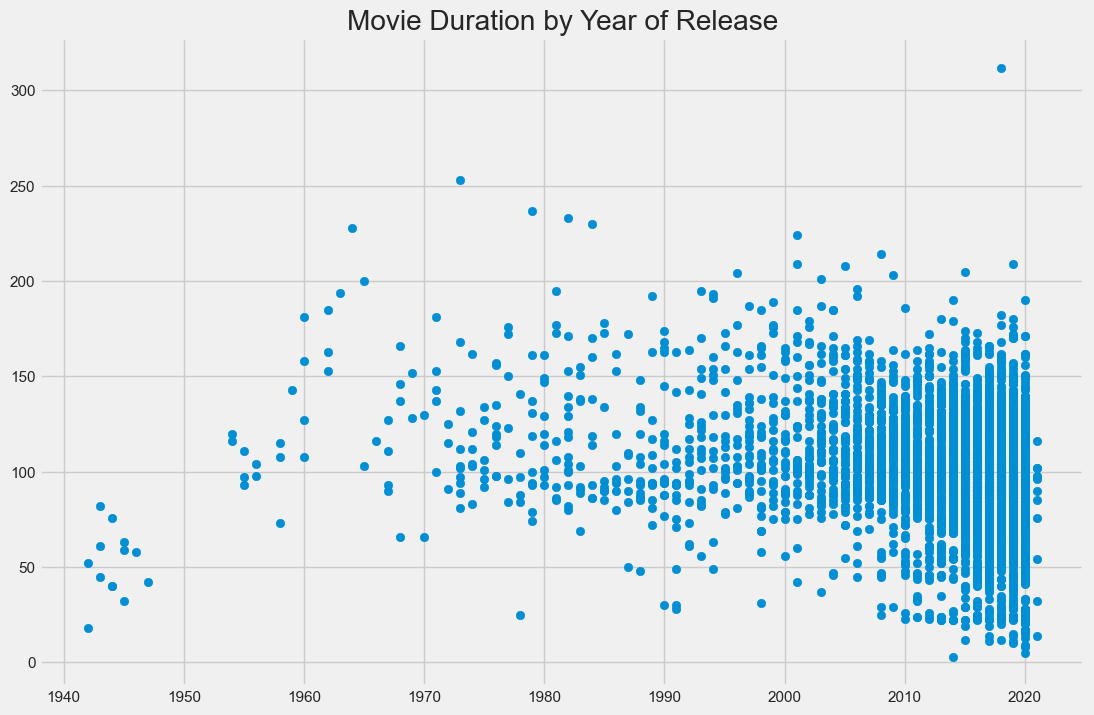

In [76]:
fig = plt.figure(figsize=(12,8))

plt.scatter(x=netflix_movies_col_subset['release_year'],y=netflix_movies_col_subset['duration'])

plt.title("Movie Duration by Year of Release")

plt.show()

### 3. Digging deeper

<li> Lets filter our DataFrame for movies with a duration under 60 minutes and look at the genres. </li>

In [77]:
short_movies = netflix_movies_col_subset.loc[(netflix_movies_col_subset['duration'] < 60)]

short_movies.head(20)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


In [78]:
short_movies.isna().sum()

title            0
country         66
genre            0
release_year     0
duration         0
dtype: int64

In [85]:
# we will replace the missing values with the value that appears the most. In this case is "United States"

short_movies=short_movies.replace(np.nan, 'United States', regex=True)

In [86]:
short_movies.isna().sum()

title           0
country         0
genre           0
release_year    0
duration        0
dtype: int64

### Marking non-feature films and plot them

<p>It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster. </p>

In [50]:
# we will use colors for the genres that we are interested in to visualize
colors = []

for color,row in netflix_movies_col_subset.iterrows() :
    if row['genre']=="Children":
        colors.append("red")
    elif row['genre']=="Documentaries" :
        colors.append("blue")
    elif row['genre']=="Stand-Up" :
        colors.append("green")
    else:
        colors.append("black")
         
colors[:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'blue']

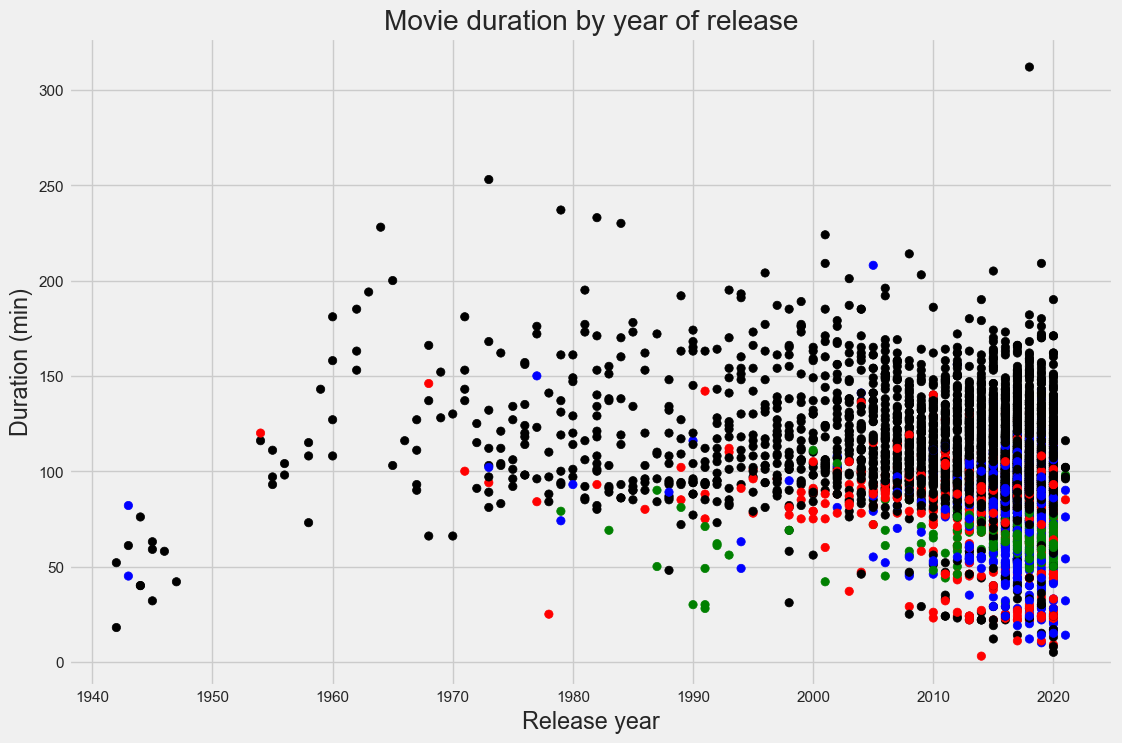

In [51]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

plt.scatter(x=netflix_movies_col_subset['release_year'],y=netflix_movies_col_subset['duration'],c=colors)

plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.show()

### we can see that genres, such as children's movies and documentaries, are all clustered around the bottom half of the plot. 


### Movies duration had not decreased over time. In fact it remains stable. However, the genres which where mentioned before ( children's movies, documentaries, Stand-Up Comedies ), show a small duration decrease in comparison with the rest genres, that is reasonable due to their species. 